# Предсказание продаж

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
data = pd.read_csv('Data.csv', sep=';')
data.head()

,дата,час,количество,сумма
0,01.01.2020,10,1,449.91
1,01.01.2020,13,4,2021.80
2,01.01.2020,16,2,1369.30
3,01.01.2020,19,3,1927.52
4,01.01.2020,22,3,934.60


## Преобразование даты в timestamp

In [3]:
import datetime

In [4]:
def date_to_timestamp(date):
    date['дата'] = datetime.datetime.strptime(date['дата'], "%d.%m.%Y")
    return datetime.datetime.timestamp(date['дата'])

In [5]:
data['дата'] = data.apply(date_to_timestamp, axis=1)

In [6]:
#del data['количество']
del data['час']
data.head()

,дата,количество,сумма
0,1.577815e+09,1,449.91
1,1.577815e+09,4,2021.80
2,1.577815e+09,2,1369.30
3,1.577815e+09,3,1927.52
4,1.577815e+09,3,934.60


## Группировка и суммирование данных по дате

In [7]:
data = data.groupby(by='дата', as_index=False).sum()

In [8]:
data = data.astype({'дата': 'int32', 'сумма': 'int32'})

## Разделение на тестовую и тренировочную выборки

In [9]:
X, y = data.drop(['сумма'], axis=1), data['сумма']

<AxesSubplot:xlabel='дата', ylabel='сумма'>

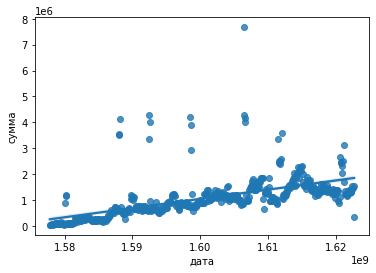

In [10]:
sns.regplot(x=data['дата'], y=data['сумма'])

In [11]:
train_size = int(X.shape[0] * 0.8)

In [12]:
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]

## Обучение модели

In [13]:
from sklearn.linear_model import LinearRegression

In [14]:
model = LinearRegression()

In [15]:
model.fit(X_train, y_train)

LinearRegression()

In [16]:
y_pred = model.predict(X_test)

<AxesSubplot:ylabel='сумма'>

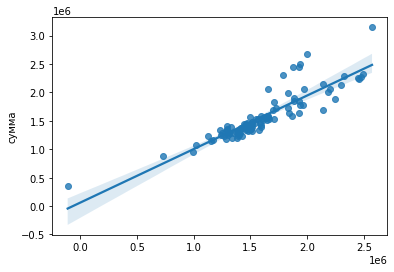

In [17]:
sns.regplot(x=y_pred, y=y_test)

## Средняя ошибка

In [18]:
MSE = np.mean((y_pred - y_test)**2)

In [19]:
MSE**0.5

195297.391650581